In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/n_queens_custom_dataset.csv')

In [3]:
print(df.head())

   BoardID  N Board Placement  Validity Difficulty Level
0        1  4    [0, 1, 2, 3]         1             Easy
1        2  4    [0, 1, 3, 2]         1             Easy
2        3  4    [0, 2, 1, 3]         1             Easy
3        4  4    [0, 2, 3, 1]         1             Easy
4        5  4    [0, 3, 1, 2]         1             Easy


In [4]:
print(df.shape)

(59, 5)


In [5]:
print(df.describe())

         BoardID          N   Validity
count  59.000000  59.000000  59.000000
mean   30.000000   6.033898   0.508475
std    17.175564   1.639660   0.504219
min     1.000000   4.000000   0.000000
25%    15.500000   4.000000   0.000000
50%    30.000000   6.000000   1.000000
75%    44.500000   8.000000   1.000000
max    59.000000   8.000000   1.000000


In [6]:
print(df.dtypes)

BoardID              int64
N                    int64
Board Placement     object
Validity             int64
Difficulty Level    object
dtype: object


In [7]:
print(df.isnull().sum())

BoardID             0
N                   0
Board Placement     0
Validity            0
Difficulty Level    0
dtype: int64


<Figure size 800x500 with 0 Axes>

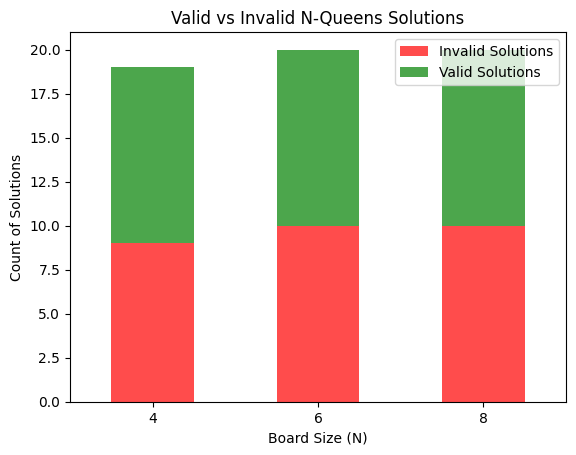

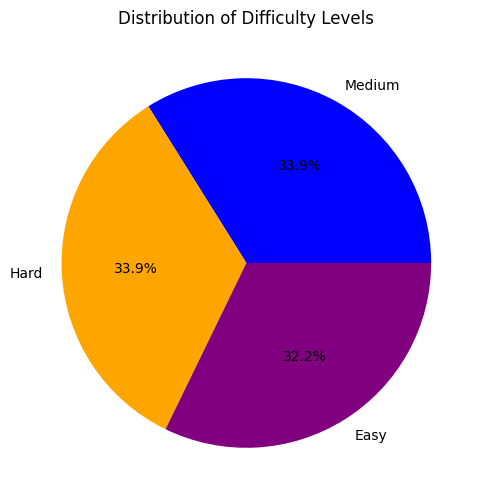

In [9]:
# Convert 'Board Placement' from string to list (if necessary)
df["Board Placement"] = df["Board Placement"].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Group by board size (N) and count valid/invalid solutions
validity_counts = df.groupby(["N", "Validity"]).size().unstack().fillna(0)
validity_counts.columns = ["Invalid Solutions", "Valid Solutions"]

# 📊 **Bar Chart: Valid vs Invalid Solutions**
plt.figure(figsize=(8, 5))
validity_counts.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.7)
plt.xlabel("Board Size (N)")
plt.ylabel("Count of Solutions")
plt.title("Valid vs Invalid N-Queens Solutions")
plt.legend(["Invalid Solutions", "Valid Solutions"])
plt.xticks(rotation=0)
plt.show()

# 📊 **Pie Chart: Distribution of Difficulty Levels**
plt.figure(figsize=(6, 6))
df["Difficulty Level"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "orange", "purple"])
plt.title("Distribution of Difficulty Levels")
plt.ylabel("")
plt.show()